## Plot zonal-mean total column ozone

Solutions plotting the CCMI2022 ensemble members and ensemble mean.

In [1]:
import iris
import iris.analysis
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import cf_units

In [2]:
# define the locations of the various datasets
# CCMI2022 refD1 ensemble
ensdata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_Amon_UKESM1-StratTrop_refD1_r?i1p1f2_gn_19600101-20190101.nc'
# CCMI1 refC1
ccmidata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_monthly_UMUKCA-UCAM_refC1_r1i1p1_*.nc'
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
# read-in the data
# 3x ensemble members for CCMI2022
inens=iris.load(ensdata,'toz')

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'toz'
  warnings.warn(
/tmp/ipykernel_4737/1802891454.py:3: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  inens=iris.load(ensdata,'toz')
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'toz'
  warnings.warn(
/tmp/ipykernel_4737/1802891454.py:3: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  inens=iris.load(ensdata,'toz')
/home/ubuntu/miniconda3/lib/python3.

In [4]:
# CCMI2022 data is in units of m rather than Dobson units, so will need to convert
duconv=1.0e5

# ensemble mean from CCMI2022
ens=iris.cube.CubeList()
for cube in inens:
    # convert to DU for this set of data
    cube.data=cube.data/duconv
    cube.units='DU'
    ens.append(cube)

In [5]:
# calculate ensemble mean
s=list(ens[0].data.shape)
s.append(len(ens))

arr=np.zeros(s)
for i in range(len(ens)):
    arr[:,:,:,i]=ens[i].data[:,:,:]
darr=np.mean(arr,axis=3)
ensmean=ens[0].copy()
ensmean.data=darr

In [6]:
# zonal mean
ens_zm=iris.cube.CubeList()
for cube in ens:
    cube=cube.collapsed('longitude',iris.analysis.MEAN)
    ens_zm.append(cube)
    
ensmean_zm=ensmean.collapsed('longitude',iris.analysis.MEAN)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [7]:
# levels for plotting
clevs=np.arange(80,560,20)

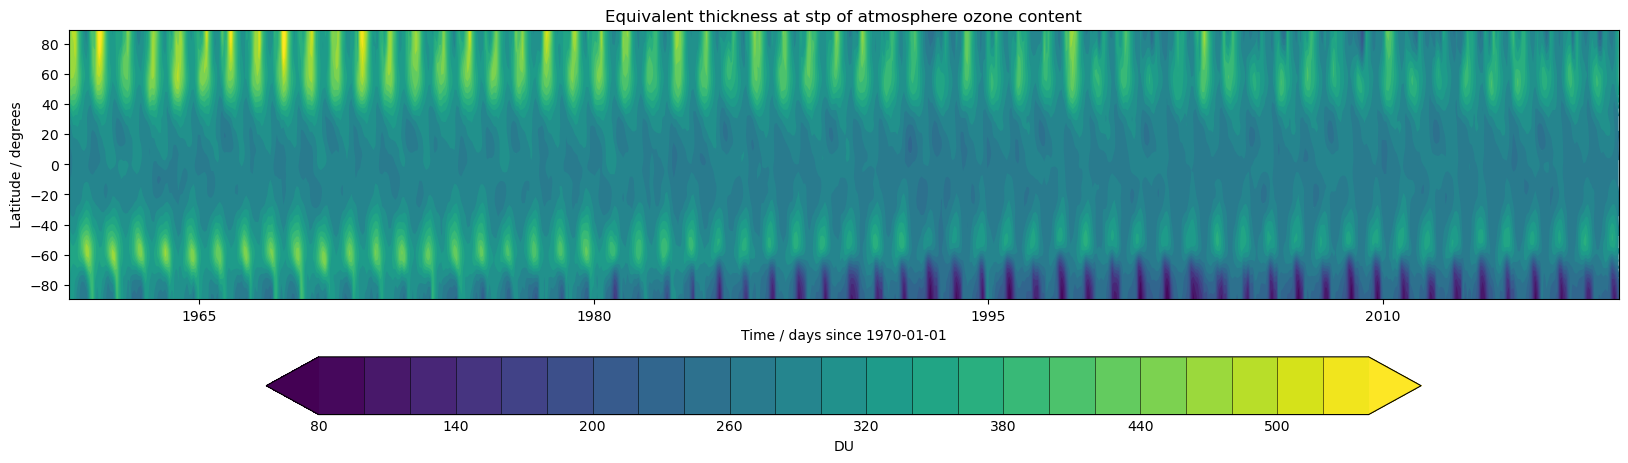

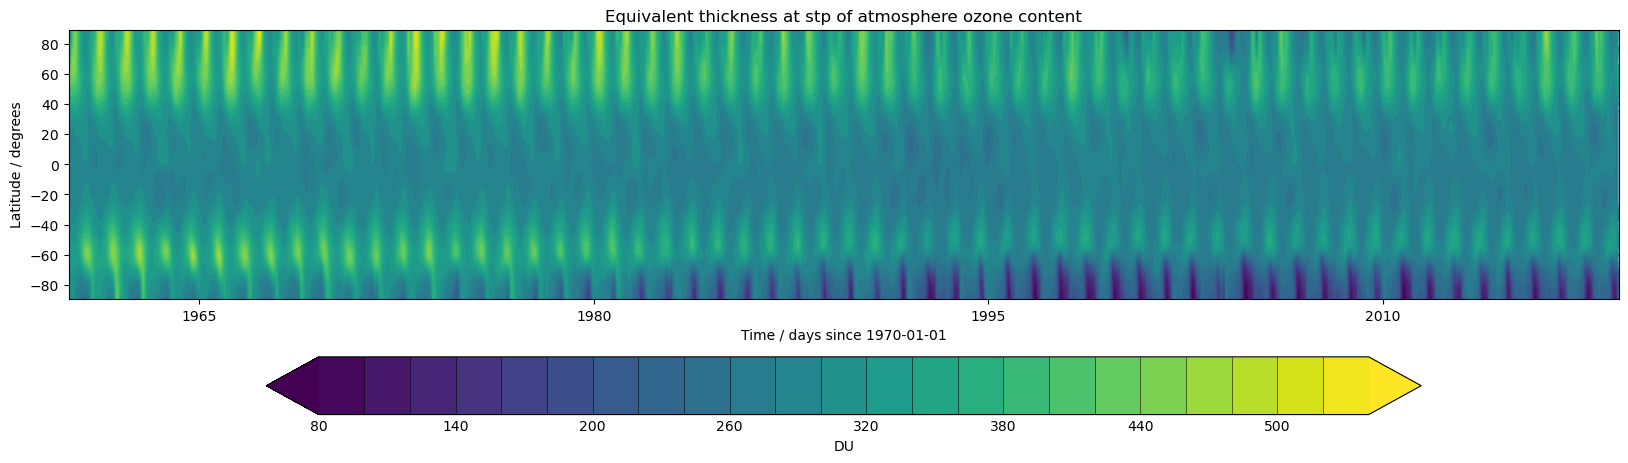

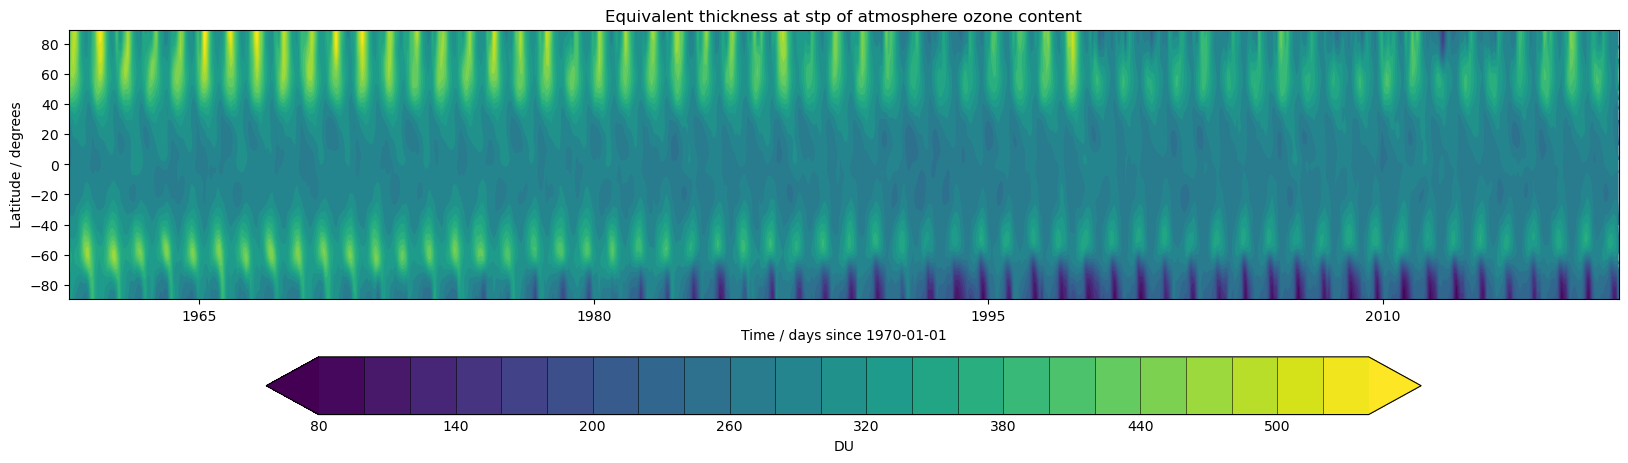

In [8]:
for cube in ens_zm:
    # quite a lot of data so stretch the plot
    plt.figure(figsize=(20,5))
    qplt.contourf(cube, clevs, extend='both')
    plt.show()

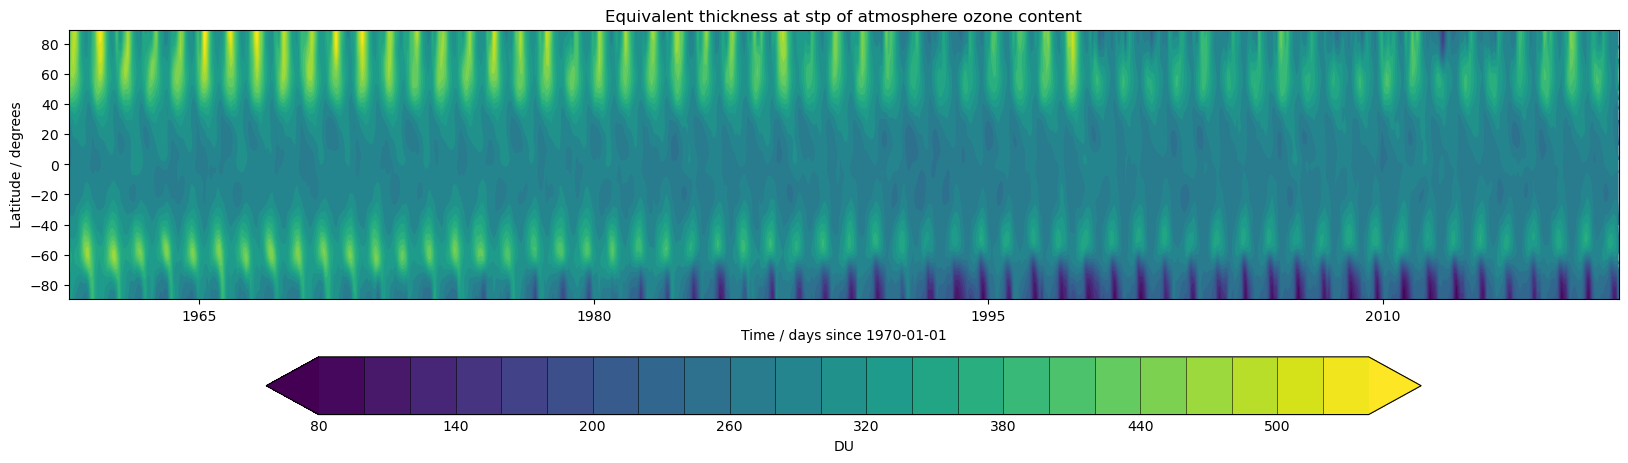

In [9]:
# quite a lot of data so stretch the plot
plt.figure(figsize=(20,5))
qplt.contourf(cube, clevs, extend='both')
plt.show()